# Keras: Logistic Regression Vs Neural Network

This is a simple exercise that compares Logistic Regression with a Neural Network.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn

## Binary Classification 

## Create Data

In [2]:
num_points = 500

In [3]:
noise = .2

### Class 1 

In [4]:
data1 = np.linspace(-1, 3.5, num_points) + np.random.normal(0, noise, num_points)
data2 = np.sin(np.linspace(-1, 3.5, num_points)) + np.random.normal(0, noise, num_points)

In [5]:
data = pd.DataFrame([data1,data2]).T

In [6]:
data['class'] = 0

### Class 2

In [7]:
data3 = np.linspace(3, 7, num_points) + np.random.normal(0, noise, num_points) - 1.5
data4 = np.sin(np.linspace(3, 7, num_points)) + np.random.normal(0, noise, num_points) -0

In [8]:
data2 = pd.DataFrame([data3,data4]).T

In [9]:
data2['class'] = 1

### Combine Data

In [10]:
data = data.append(data2)

In [11]:
data.columns = ['A','B','class']

### Scale

In [12]:
data['A'] = data['A']/6 

### Plot Data

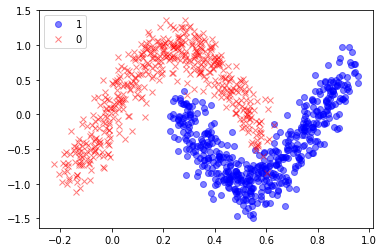

In [13]:
plt.plot(data.loc[data['class'] == 1,'A'],data.loc[data['class'] == 1,'B'], 'ob', alpha = .5)
plt.plot(data.loc[data['class'] == 0,'A'],data.loc[data['class'] == 0,'B'], 'xr', alpha = .5)
plt.legend(['1', '0','2'])

### Split Data 

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['class'],axis = 1), 
                                                    data['class'], 
                                                    test_size=0.2)

### Logistic Regression

A neural network with only a single node which has a sigmoid for its activation function is a Logistic Regression.

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [17]:
model = Sequential()

In [18]:
model.add(Dense(1,input_shape=(2,), activation='sigmoid'))

In [19]:
model.compile(Adam(lr=0.05),loss = 'binary_crossentropy',metrics = ['accuracy'])

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.fit(X_train.values,y_train.values,epochs = 200,verbose=0)

In [22]:
model.evaluate(X_test.values,y_test.values)

200/200 [==============================] - 0s 110us/step


[0.17848157554864882, 0.91500000000000004]

In [23]:
model_train_pred = model.predict(X_train.values)
model_test_pred = model.predict(X_test.values)

In [24]:
model_train_class = np.round(model_train_pred)
model_test_class = np.round(model_test_pred)

### Accuracy

In [25]:
def train_test_accuracy(y_train, y_test, train_pred, test_pred):
    from sklearn.metrics import classification_report
    from sklearn.metrics import accuracy_score
    print("Train Accuracy: " + str(accuracy_score(y_train,train_pred)))
    print("Test Accuracy: " + str(accuracy_score(y_test,test_pred) ))
    print("\n Classification Report:(test set)")
    print(classification_report(y_train,train_pred))
    return

In [26]:
train_test_accuracy(y_train, y_test, model_train_class, model_test_class)

Train Accuracy: 0.8875
Test Accuracy: 0.915

 Classification Report:(test set)
             precision    recall  f1-score   support

          0       0.89      0.88      0.88       384
          1       0.89      0.90      0.89       416

avg / total       0.89      0.89      0.89       800



In [27]:
def plot_decision_boundary(model, X, y):
    amin = X.min(axis=0) - 0.1
    amax = X.max(axis=0) + 0.1
    bmin = y.min(axis=0) - 0.1
    bmax = y.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    c = model.predict(ab)
    cc = c.reshape(aa.shape)

    plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)
    plt.plot(data.loc[data['class'] == 0,'A'], data.loc[data['class'] == 0,'B'], 'ob', alpha=0.5)
    plt.plot(data.loc[data['class'] == 1,'A'], data.loc[data['class'] == 1,'B'], 'xr', alpha=0.5)
    plt.legend(['0', '1'])
    return 


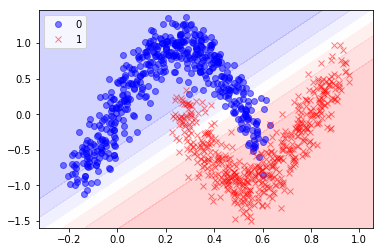

In [28]:
plot_decision_boundary(model, data['A'].values, data['B'].values)

### Neural Network

In [29]:
deep_model = Sequential()

In [30]:
deep_model.add(Dense(units = 10, input_shape =(2,) ,activation='relu'))
deep_model.add(Dense(units = 10, activation='relu'))
deep_model.add(Dense(units = 1, activation='sigmoid'))

In [31]:
deep_model.compile(Adam(lr = 0.1), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [32]:
deep_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                30        
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [33]:
deep_model.fit(X_train.values,y_train.values,epochs = 100,verbose=0)

In [34]:
deep_model_train_pred = deep_model.predict(X_train.values)
deep_model_test_pred = deep_model.predict(X_test.values)

In [35]:
deep_model_train_class = np.round(deep_model_train_pred)
deep_model_test_class = np.round(deep_model_test_pred)

### Accuracy

In [36]:
train_test_accuracy(y_train, y_test, deep_model_train_class, deep_model_test_class)

Train Accuracy: 0.99375
Test Accuracy: 0.98

 Classification Report:(test set)
             precision    recall  f1-score   support

          0       0.99      0.99      0.99       384
          1       0.99      1.00      0.99       416

avg / total       0.99      0.99      0.99       800



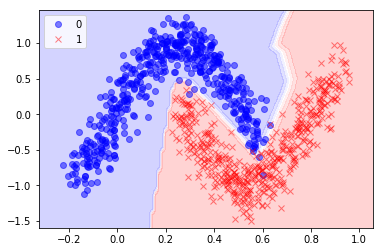

In [37]:
plot_decision_boundary(deep_model, data['A'].values, data['B'].values)

# Multiway 

## Create Data

In [38]:
data5 = np.linspace(-1, 3.5, num_points) + np.random.normal(0, noise, num_points) 
data6 = np.sin(np.linspace(-1, 3.5, num_points)) + np.random.normal(0, noise, num_points) + 1 

### Scale

In [39]:
data5 = data5/6

In [40]:
data3 = pd.DataFrame([data5,data6]).T

In [41]:
data3['class'] = 2

In [42]:
data3.columns = ['A','B','class']

In [43]:
data = data.append(data3)

## Plot Data

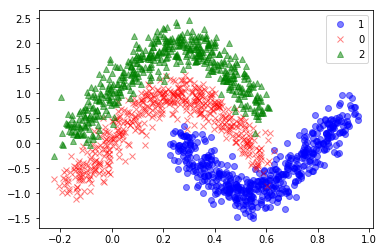

In [44]:
plt.plot(data.loc[data['class'] == 1,'A'],data.loc[data['class'] == 1,'B'], 'ob', alpha = .5)
plt.plot(data.loc[data['class'] == 0,'A'],data.loc[data['class'] == 0,'B'], 'xr', alpha = .5)
plt.plot(data.loc[data['class'] == 2,'A'],data.loc[data['class'] == 2,'B'], '^g', alpha = .5)

plt.legend(['1', '0','2'])

### Split Data

In [45]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['class'],axis = 1), 
                                                    data['class'], 
                                                    test_size=0.2)

In [46]:
y_train_softmax = to_categorical(y_train, num_classes=None)

In [47]:
y_test_softmax = to_categorical(y_test, num_classes=None)

### Softmax Regression

In [48]:
model_softmax = Sequential()

In [49]:
model_softmax.add(Dense(3, input_shape =(2,) ,activation='softmax'))

In [50]:
model_softmax.compile(Adam(lr=0.05),loss = 'categorical_crossentropy',
                      metrics = ['accuracy'])

In [51]:
model_softmax.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 3)                 9         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [52]:
model_softmax.fit(X_train.values,y_train_softmax,epochs = 200,verbose=0)

In [53]:
model_softmax.evaluate(X_test.values,y_test_softmax)

300/300 [==============================] - 0s 137us/step


[0.46401542901992798, 0.76333333492279054]

In [54]:
model_softmax_train_pred = model_softmax.predict(X_train.values)
model_softmax_test_pred = model_softmax.predict(X_test.values)

In [55]:
model_softmax_train_class = np.argmax(model_softmax_train_pred,axis = 1)
model_softmax_test_class = np.argmax(model_softmax_test_pred,axis = 1)

### Accuracy

In [56]:
train_test_accuracy(y_train, y_test, model_softmax_train_class, model_softmax_test_class)

Train Accuracy: 0.778333333333
Test Accuracy: 0.763333333333

 Classification Report:(test set)
             precision    recall  f1-score   support

          0       0.70      0.61      0.65       406
          1       0.89      0.91      0.90       397
          2       0.74      0.82      0.78       397

avg / total       0.78      0.78      0.78      1200



### Deep Learning

In [57]:
deep_model_softmax = Sequential()

In [58]:
deep_model_softmax.add(Dense(units = 10,input_shape=(2,), activation='relu'))
deep_model_softmax.add(Dense(units = 10, activation='relu'))
deep_model_softmax.add(Dense(units = 3, activation='softmax'))

In [59]:
deep_model_softmax.compile(Adam(lr=0.05),loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [60]:
deep_model_softmax.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                30        
_________________________________________________________________
dense_7 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 33        
Total params: 173
Trainable params: 173
Non-trainable params: 0
_________________________________________________________________


In [61]:
deep_model_softmax.fit(X_train.values,y_train_softmax,epochs = 200,verbose=0)

In [62]:
deep_model_softmax.evaluate(X_test.values,y_test_softmax)

300/300 [==============================] - 0s 187us/step


[0.067041418502728142, 0.9766666674613953]

In [63]:
deep_model_softmax_train_pred = deep_model_softmax.predict(X_train.values)
deep_model_softmax_test_pred = deep_model_softmax.predict(X_test.values)

In [64]:
deep_model_softmax_train_class = np.argmax(deep_model_softmax_train_pred,axis = 1)
deep_model_softmax_test_class = np.argmax(deep_model_softmax_test_pred,axis = 1)

### Accuracy

In [65]:
train_test_accuracy(y_train, y_test, deep_model_softmax_train_class, deep_model_softmax_test_class)

Train Accuracy: 0.983333333333
Test Accuracy: 0.976666666667

 Classification Report:(test set)
             precision    recall  f1-score   support

          0       0.98      0.98      0.98       406
          1       0.99      1.00      0.99       397
          2       0.98      0.98      0.98       397

avg / total       0.98      0.98      0.98      1200



# Conclusion

In our little experiment we discovered that a neural network is much better at making predictions compared to a logistic regression. This is because a Neural Network can capture more complex patterns in the data without overfitting. In the 2-way classification problem it was 10% more accurate than logistic regression while, it is about 20% more accurate in the 3-way classification problem. We can say that logistic regression's accuracy decreases as we add more classes or I think a more appropriate statement is that the neural network stays at around 99% even if we add more class. 